# Project 3: Data and Maps!

Thanks to John P. Dickersion for the project idea!

**Posted:** Nov 7th, 2019.

**Due:** Nov. 26th, 2019.

In this project we are going to work with a fairly clean set of data from Baltimore crime data covering the years 2011 and 2012.  This is a fairly open ended project, you will need to work with the data a bit and come up with your own things to show.

In [2]:
# Includes and Standard Magic...
### Standard Magic and startup initializers.

# Load Numpy
import numpy as np
# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
# Load Pandas
import pandas as pd
# Load Stats
from scipy import stats
import folium
import re

import datetime as dt

# This lets us show plots inline and also save PDF plots if we want them
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

## Part 1: Data Wrangling.

The data is a bit messy to start out with.  Perform the following tasks to make it clean and tidy.

1. Split the `Location 1` column into a `lat` and `long` columns.  Ensure that the columns are of float type and you drop any record that is missing a location.
2. You can drop the `arrest`, `post`, `charge`, and the `Location 1` column.
3. Merge the date and time column and make sure they are the proper type.  Drop any row that does not have a date and time.
4. Set the index so that we can sort and slice based on the date/time.
5. Drop any records that have NA values.
6. Go through the remaining columns and ensure you have set the dtype properly.
7. Display the head of the table and the dtypes in your notebook.





### Code Description:
First I dropped the na values using dropna
To create latitude and longituted columns, I defined functions to split and clean up the `Location 1` entries. Then I used .apply() to create new lat and long columns.

To merge datetimes into one column, I created a for loop to split date and time strings then create datetime objects with them. The for loop created entries of a new column in the dataframe.

I then set the index as the datetime columns and dropped unneccessary columns.

In [3]:
#Read in dataframe
raw_df = pd.read_csv("./BPD_Arrests.csv")

#drop NaN location values
raw_df.dropna(axis = 0, inplace = True)

#define function to return latitude (first value)
def get_lat(lat_long):
    temp_array = re.split(" ", str(lat_long))
    return float(re.sub(r"\(|\,", "", temp_array[0]))

#define function to get longitute (second value)
def get_long(lat_long):
    temp_array = re.split(" ", str(lat_long))
    return float(re.sub(r"\)", "", temp_array[1]))

# make colums for latitude and longitude
raw_df["Latitude"] = raw_df["Location 1"].apply(get_lat)
raw_df["Longitude"] = raw_df["Location 1"].apply(get_long)

# Drop the arrest, post, charge, and the Location 1 column
# raw_df.drop(axis = 1, columns = ["arrest", "post", "charge", "Location 1"], inplace = True)
raw_df.drop(axis = 1, columns = ["arrest", "post", "charge"], inplace = True)

In [4]:
# create a new columns using the arrays to initialize datetime objects
raw_df["arrestDateTime"] = pd.Series()
for i, row in raw_df.iterrows():
    #split date and time into arrays
    date_array = re.split("/", row["arrestDate"])
    time_array = re.split(":", row["arrestTime"])
    #make a column with datetime object
    raw_df['arrestDateTime'][i] = dt.datetime(
        int(date_array[2]), 
        int(date_array[0]), 
        int(date_array[1]), 
        int(time_array[0]), 
        int(time_array[1]), 
        int(time_array[2])
    )

# drop arrestTime and arrestDate columns
raw_df.drop(axis = 1, columns = ["arrestTime", "arrestDate"], inplace = True)
raw_df


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,race,sex,arrestLocation,incidentOffense,incidentLocation,chargeDescription,district,neighborhood,Location 1,Latitude,Longitude,arrestDateTime
1,37,B,M,2000 Wilkens Ave,79-Other,Wilkens Av & S Payson St,Reckless Endangerment || Hand Gun Violation,SOUTHERN,Carrollton Ridge,"(39.2814026274, -76.6483635135)",39.281403,-76.648364,2011-01-01 00:01:00
3,50,B,M,2100 Ashburton St,79-Other,2100 Ashburton St,Reg Firearm:Illegal Possession || Hgv,WESTERN,Panway/Braddish Avenue,"(39.3117196723, -76.6623546313)",39.311720,-76.662355,2011-01-01 00:04:00
5,41,B,M,2900 Spellman Rd,81-Recovered Property,2900 Spelman Rd,Reckless Endangerment || Handgun Violation,SOUTHERN,Cherry Hill,"(39.2449886230, -76.6273582432)",39.244989,-76.627358,2011-01-01 00:05:00
6,29,B,M,800 N Monroe St,79-Other,800 N Monroe St,Handgun On Person || Handgun Violation,WESTERN,Midtown-Edmondson,"(39.2979815407, -76.6475113571)",39.297982,-76.647511,2011-01-01 00:05:00
9,53,B,M,3300 Woodland Ave,54-Armed Person,3300 Woodland Av,Reckless Endangerment || Hgv,NORTHWESTERN,Central Park Heights,"(39.3436773374, -76.6727297618)",39.343677,-76.672730,2011-01-01 00:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104521,30,B,M,1000 Pennsylvania St,87-Narcotics,1000 Pennsylvania Av,Cds:Possess-Not Marihuana || Cds Violation,CENTRAL,Heritage Crossing,"(39.2979988686, -76.6278482100)",39.297999,-76.627848,2012-12-31 23:00:00
104522,32,B,M,3300 Pulaski St,79-Other,3300 Pulaski Hw,Handgun On Person || Handgun Violation,SOUTHEASTERN,Ellwood Park/Monument,"(39.2958396988, -76.5712467336)",39.295840,-76.571247,2012-12-31 23:00:00
104524,34,B,M,3800 Belair Rd,4E-Common Assault,3600 Belair Rd,Asslt-Sec Degree || Assault,NORTHEASTERN,Belair-Edison,"(39.3252613570, -76.5689030474)",39.325261,-76.568903,2012-12-31 23:30:00
104525,38,B,M,2000 Mckean Ave,87-Narcotics,1700 Mckean Av,Att-Cds Manuf/Dist-Narc || Distribution Cds,WESTERN,Mondawmin,"(39.3116837460, -76.6475011849)",39.311684,-76.647501,2012-12-31 23:40:00


In [5]:
#set index as datetimes
crime_df = raw_df.set_index("arrestDateTime")

# check that all columns have the correct dtype
crime_df.dtypes

age                    int64
race                  object
sex                   object
arrestLocation        object
incidentOffense       object
incidentLocation      object
chargeDescription     object
district              object
neighborhood          object
Location 1            object
Latitude             float64
Longitude            float64
dtype: object

In [6]:
# display dataframe
crime_df.head()

,age,race,sex,arrestLocation,incidentOffense,incidentLocation,chargeDescription,district,neighborhood,Location 1,Latitude,Longitude
arrestDateTime,,,,,,,,,,,,
2011-01-01 00:01:00,37,B,M,2000 Wilkens Ave,79-Other,Wilkens Av & S Payson St,Reckless Endangerment || Hand Gun Violation,SOUTHERN,Carrollton Ridge,"(39.2814026274, -76.6483635135)",39.281403,-76.648364
2011-01-01 00:04:00,50,B,M,2100 Ashburton St,79-Other,2100 Ashburton St,Reg Firearm:Illegal Possession || Hgv,WESTERN,Panway/Braddish Avenue,"(39.3117196723, -76.6623546313)",39.311720,-76.662355
2011-01-01 00:05:00,41,B,M,2900 Spellman Rd,81-Recovered Property,2900 Spelman Rd,Reckless Endangerment || Handgun Violation,SOUTHERN,Cherry Hill,"(39.2449886230, -76.6273582432)",39.244989,-76.627358
2011-01-01 00:05:00,29,B,M,800 N Monroe St,79-Other,800 N Monroe St,Handgun On Person || Handgun Violation,WESTERN,Midtown-Edmondson,"(39.2979815407, -76.6475113571)",39.297982,-76.647511
2011-01-01 00:15:00,53,B,M,3300 Woodland Ave,54-Armed Person,3300 Woodland Av,Reckless Endangerment || Hgv,NORTHWESTERN,Central Park Heights,"(39.3436773374, -76.6727297618)",39.343677,-76.672730


### Question 1:
How many records did we drop using our processing above?  Do you think this will affect our data later?  What type of missingness do you think these values have? 

In [7]:
# read in the data again and check the columns
initial_df = pd.read_csv("./BPD_Arrests.csv")

initial_df.dtypes
# initial_df[initial_df["chargeDescription"] == "Violation Of Probation || Violation Of Probation"]["Location 1"].value_counts()

arrest               float64
age                    int64
race                  object
sex                   object
arrestDate            object
arrestTime            object
arrestLocation        object
incidentOffense       object
incidentLocation      object
charge                object
chargeDescription     object
district              object
post                 float64
neighborhood          object
Location 1            object
dtype: object

### Answer 1:
The initial data contained 104528 rows. After we dropped the rows with na values, the dataframe contained 54040 rows. We dropped a little less than half our data. This can lead to our sample having a **larger variance** and/or having a **biased sample.**

### Question 2:
Thinking about the kinds of missing-ness in our data.  What is one imputation method that we could have used to fill in some gaps?  Implement one such method that is not just `dropna`.

### Answer 2:
I infer that the data is *Missing at Random*. In order to account for the missing data. I will use other information to predict missing values. When the lat/long of a row is missing, I will check if the neighboorhood is blank. If it is, I will fill the na values with a random sample from the whole dataframe. If not, I will take a random sample from the same neighborhood. Doing this enforces randomness. This is known as bootstrapping.

In [9]:
# TODO: write working code to impute the data. I got stuck on this question so, I skipped it for now

# for j, row in initial_df.iterrows():
#     if (row["Location 1"][0] == np.nan):
#         print("if works")

# if (np.isnan(initial_df.iloc[0]["Location 1"])):
#     initial_df.iloc[0]["Location 1"] = initial_df[initial_df["Location 1"] != np.nan].sample(axis = 0, n=1)["Location 1"]
#     initial_df.iloc[0]["Location 1"] = raw_df.sample(axis = 0, n=1)["sex"]


# initial_df
# raw_df.sample(axis = 0, n=1)["Latitude"]




## Part 2: Exploratory Data Analysis

We can use the Pandas time and date slicing functions to group our data by either day, quarter, or time.  Have a look at [pd.between_time()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.between_time.html).  I want you to explore this data in some interesting ways.

### Problem 1.
Use cut and other Pandas functions to display the joint distribution of Age and Race.  This table should not have every age in it but break the age down into a reasonable number of sub groups.

Pick another pair of variables.  Display a joint or conditional distribution and explain **why** you chose it and what the take away message is.



In [10]:
# cut the data into different bins based on age
crime_df["age_bin"] = pd.cut(crime_df["age"], bins = 6)

#create a pivot table that gives counts of different categories of our data
crime_pt = crime_df.pivot_table(
    index="age_bin", columns="race",
    values="arrestLocation", aggfunc="count"
)
# Divide the values by the total number of values to get joint distribution
joint_crime_dist = crime_pt / crime_pt.sum().sum()

# Display Joint distribution of age and race in baltimore crimes.
joint_crime_dist

race,A,B,H,I,U,W
age_bin,,,,,,
"(-0.087, 14.5]",NaN,0.000315,NaN,NaN,0.000019,0.000037
"(14.5, 29.0]",0.001055,0.412010,NaN,0.000999,0.006625,0.056662
"(29.0, 43.5]",0.000555,0.221688,NaN,0.000611,0.004275,0.052221
"(43.5, 58.0]",0.000463,0.193005,0.000019,0.000315,0.001536,0.025740
"(58.0, 72.5]",NaN,0.018949,NaN,0.000037,0.000222,0.001962
"(72.5, 87.0]",NaN,0.000518,NaN,NaN,NaN,0.000167


### Answer 1:
Above I showed the joint distribution of age and race in Baltimore crimes. From this we can conclude things like: "Most arrests in Baltimore are on individuals between the ages of 14 and 43."

It is no secret that Black men are arrested at a disproportionate rate in Baltimore. Next I will calculate the conditional distribution of Race and Sex to show this.

In [11]:
race_sex_pt = crime_df.pivot_table(
    index="race", columns="sex",
    values="arrestLocation", aggfunc="count"
)
race_sex_pt
# conditional probability that a male who is arrested will be black.
race_sex_pt["M"] / race_sex_pt["M"].sum()

# There is an 86.7% chance that a male who is arrested will be black.

race
A    0.002114
B    0.867915
H    0.000023
I    0.001977
U    0.013499
W    0.114472
Name: M, dtype: float64

### Problem 2.

Pick (at least) three nieghborhoods from the data, show the crime in 2011 versus 2012 for each of these neighborhoods on one plot.  Make sure that you use visaul features to distinguish the two years.

**Hint:** You may want to look back at the lab where we worked with baby names... and maybe the [unstack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html) function.

### Code Description:
I selected only the data I wanted from the data frame. I used boolean masking to select the three neighborhoods with the most datapoints. Then I grouped the data by year and neighborhood to make it easy to graph. After that I called plot.bar and selected the colors of my bar graph in the parameters.

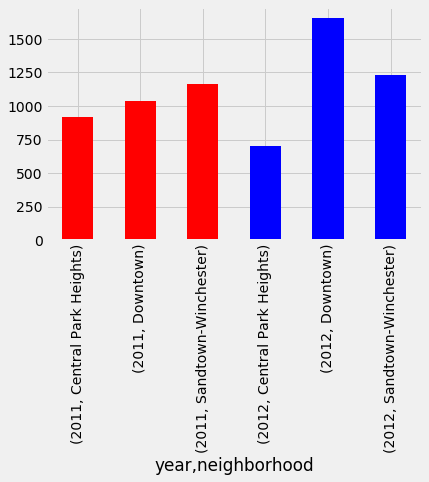

In [12]:
#create a column in the df for year
crime_df["year"] = crime_df.index.year

#use boolean masking to select your desired information
neighborhoods = ["Downtown", "Sandtown-Winchester", "Central Park Heights"]
crime_by_year = crime_df[(crime_df["neighborhood"] == "Downtown") |
                         (crime_df["neighborhood"] == "Sandtown-Winchester") |
                         (crime_df["neighborhood"] == "Central Park Heights")]

#group by year and neighborhood
grouped_c = crime_by_year.groupby(["year","neighborhood"])["neighborhood"]
#change the values to counts
grouped_c = grouped_c.count()

#display the bar graph
grouped_c.plot.bar(y = "age", color = ["r", "r", "r", "b", "b", "b"])

### Problem 3.

Show me one other interesting thing about the data.  It can be anything you find interesting but I'd encourage you to use an advanced method from class (regression, classification, hypothesis testing etc.).  If you can, maybe look at something like [the demographics of Balitmore](https://en.wikipedia.org/wiki/Baltimore) and compare those to what is in our data.

### Answer 3
I will show a linear regression between the age of individuals and the arrest rate. Then I will calculate a pearson correlation coefficient.

From the plots we see that there is a strong negative correlation between the age and the arrest count for individuals of that age. In other words, young individuals are arrested at higher rates than older individuals. This regression could be made stronger by removing entries below eighteen years old. This entries weaken our correlation and they are unneccessary outliers.

The Pearson Correlation Coefficient tells us there is a correlation of **-0.64** between the two. This is a strong correlation.

,count,age
count,1.000000,-0.642369
age,-0.642369,1.000000


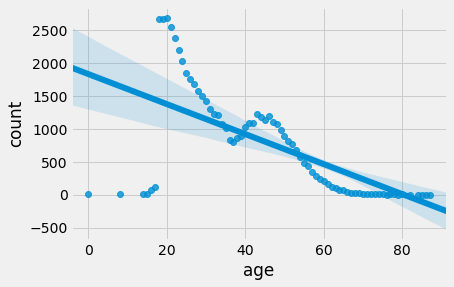

In [13]:
import seaborn as sns
crime_count = crime_df["age"].value_counts()
as_df = pd.DataFrame(crime_count, columns = ["age"])
as_df.rename(columns = {"age":"count"}, inplace = True)
as_df["age"] = as_df.index

#display linear regression plot
sns.regplot(x="age", y="count", data=as_df)

# compute correlation coefficient
as_df.corr()

## Part 3: Interactive Maps.

Using the following code stub to start up an interactive map. You can find more information about folium here: https://github.com/python-visualization/folium/ and https://folium.readthedocs.org//


### Problem 5.

Add graphical elements to display the data. For instance, add circles, with colors indicating sex. Or circles with colors indicating race. Or anything else that strikes your fancy.  Plot some colors over the map to illustrate some joint or conditional distribution of the data.

**Explain using Markdown Cells** *what* you have shown in your map, *why* you have shown it in your map, and *how* a user should interpret this information.

### Explanation:

I want to calculate the "most dangerous area" on the map. To do this, I will find the quantiles of latitude and longitude. Then I will use this information to draw a circle over the most dangerous area, encompassing from the 25th percentile to the 75th percentile.

I calculated the median point and the distance from it to the 25th and 75th quantiles. Calculating the distance was a bit tricky. I needed to convert from degrees to kilometers, so I used a haversine distance function that I got from stack overflow. then I calculated the distance from each quantile to the median using the haversine equation. I took the mean average of all these values to get my circle radius. The function output my radius in kilometers, so I had to convert it to meters when I gave it to my circle maker. 

In [14]:
# import the neccessary math functions
from math import radians, cos, sin, asin, sqrt

# calculate the quantiles
_25th_percentile_lat = crime_df["Latitude"].quantile(q = 0.25)
_50th_percentile_lat = crime_df["Latitude"].quantile(q = 0.50)
_75th_percentile_lat = crime_df["Latitude"].quantile(q = 0.75)

_25th_percentile_long = crime_df["Longitude"].quantile(q = 0.25)
_50th_percentile_long = crime_df["Longitude"].quantile(q = 0.50)
_75th_percentile_long = crime_df["Longitude"].quantile(q = 0.75)

# calculate the circle center at teh 50th percentile.
circle_center = [_50th_percentile_lat, _50th_percentile_long]

# define a haversine distance function
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r


# get the average of the quantile distance
circle_radius = pd.Series([
    haversine(_50th_percentile_long, _50th_percentile_lat, _25th_percentile_long, _25th_percentile_lat),
    haversine(_50th_percentile_long, _50th_percentile_lat, _75th_percentile_long, _75th_percentile_lat)
]).mean()

# make a folium map object
map_osm = folium.Map(location=[39.29, -76.61], zoom_start=11)

# make a circle with the previously calcluated values
folium.Circle(
    radius=circle_radius*1000, #circle radius is calculated in kilometers and folium takes meters as its unit.
    location= circle_center,
    popup='The Waterfront',
    color='crimson',
    fill=True,
).add_to(map_osm)

# display the map
map_osm

## Submission

Prepare a Jupyter notebook that includes for each Problem: (a) code to carry out the step discussed, (b) output showing the result of your code, and (c) a short prose description of how your code works. Remember, the writeup you are preparing is intended to communicate your data analysis effectively. Thoughtlessly showing large amounts of output in your writeup defeats that purpose.

All axes in plots should be labeled in an informative manner. Your answers to any question that refers to a plot should include both (a) a text description of your plot, and (b) a sentence or two of interpretation as it relates to the question asked.

Submit this completed notebook which contains your answers as markdown cells to [Canvas](https://tulane.instructure.com/)

## Grading Rubric

Note that code that does not work will not be graded and you will receive a 0 for that section.  We reserve the right to deduct points for things like general sloppiness of the notebook, poor labels, unlabeled axes, etc.  You should include markdown cells to break up your notebook and **clearly label** the problems and questions below.

* Part 0 Professionalism (10 points).
  * You have used both code comments and markdown cells to professionally and clearly document your work including having a clear and clean notebook; linking to resources and documents; and doing so with code that is reasonable and efficient.

* Part 1 Wrangling (20 Points).
  * (10 Points)  Data is loaded correctly and directions are followed for munging the data appropatly.
  * (10 Points) Questions are answered in a reasonable manner.  A suggested way to impute data is present along with code.
* Part 2 Exploratory Data Analysis (40 Points).
  * (20 Points) Problem 1: Distributions are compute correctly, tables are shown, explination is coherent and clear.
  * (10 Points) Problem 2: Graph is present, visual features are present to distingush the required elements.
  * (10 Points) Problem 3: Code is present to compute an interesting feature of the data.  The feature is interpreted in a written markdown cell.
* Part 3 Interactive Maps (30 Points).
  * (20 Points) Map is displayed of Baltimore, one or more interactive elements are present.  Displayed information is non-trivial and reveals something interesting about the data.
  * (10 Points) Explination of the above map is reasonable and clear.  Addresses all points.


* Total Score:

### Credits

Thanks to [John P. Dickerson](http://jpdickerson.com/) for the project idea!